# Principle Component Analysis Applied to the Stock Market
### https://github.com/gylx/Financial-Machine-Learning-Articles 
### https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests
import fs

In [ ]:
plt.style.use('fivethirtyeight')

In [2]:
tickers = "AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,BA,BAC,BIIB,BK,BLK,BMY,C,CAT,CELG,CL,CMCSA,COF,COP,COST,CSCO,CVS,CVX,DD,DHR,DIS,DOW,DUK,EMC,EMR,EXC,F,FB,FDX,FOX,FOXA,GD,GE,GILD,GM,GOOG,GOOGL,GS,HAL,HD,HON,IBM,INTC,JNJ,JPM,KMI,KO,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,MMM,MO,MON,MRK,MS,MSFT,NEE,NKE,ORCL,OXY,PCLN,PEP,PFE,PG,PM,PYPL,QCOM,RTN,SBUX,SLB,SO,SPG,T,TGT,TWX,TXN,UNH,UNP,UPS,USB,USD,UTX,V,VZ,WBA"
tickers = tickers.split(',')
print(tickers)

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', 'ALL', 'AMGN', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMC', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HAL', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PCLN', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTN', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TWX', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'USD', 'UTX', 'V', 'VZ', 'WBA']


In [5]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 
# write to csv file


[*********************100%***********************]  99 of 99 completed

8 Failed downloads:
- AGN: No timezone found, symbol may be delisted
- MON: No timezone found, symbol may be delisted
- RTN: No timezone found, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
- UTX: No timezone found, symbol may be delisted
- TWX: No data found for this date range, symbol may be delisted
- FB: No timezone found, symbol may be delisted
- CELG: No timezone found, symbol may be delisted


AttributeError: module 'fs' has no attribute 'write_csv'

In [8]:
# write prices to csv file
prices.to_csv('prices.csv') 

In [9]:
rs = prices.apply(np.log).diff(1)

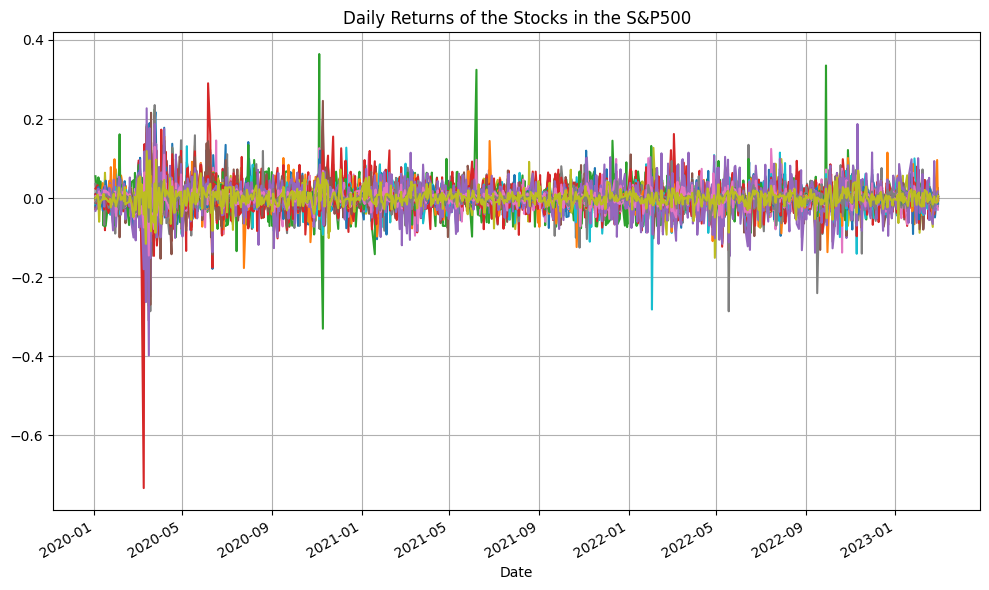

In [10]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

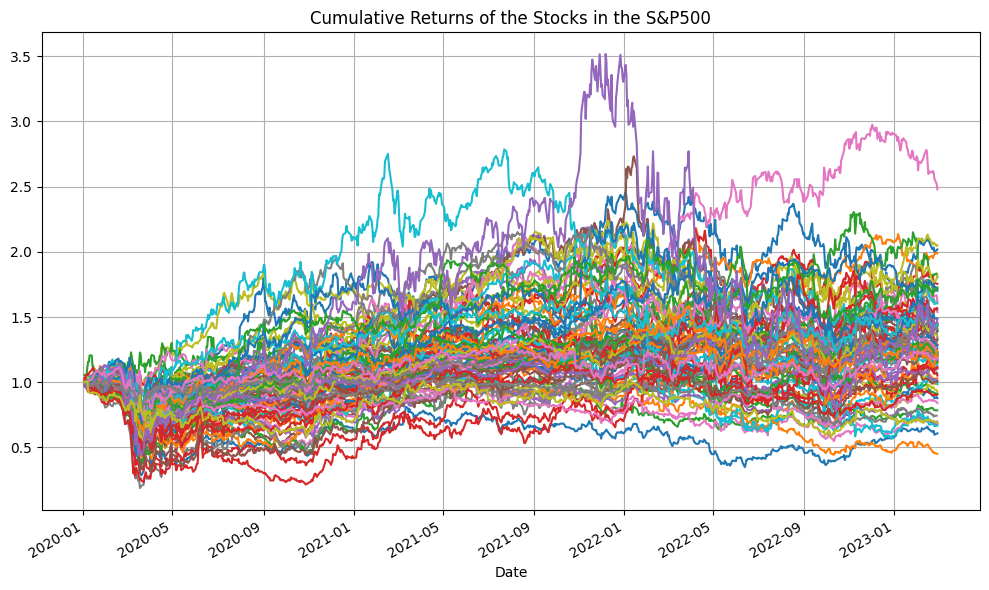

In [11]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(1).fit(rs.fillna(0))

In [ ]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

In [ ]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')